In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

import datetime
import os
import shutil

#matplotlib.rcParams['agg.path.chunksize'] = 1000


In [2]:
#output_path = "/mnt/ScratchHDD1/Max_Scratch/lbm_simulations"  # lokal HBRS
#output_path = "/home/max/Documents/lbm_simulations"  # lokal Bonn
output_path = "/home/mbille/Desktop"  # cluster_BONN

data1 = ""
#data2 = "/data_230406_150035_TtargetSearch_Re300.0_nsteps710140"

periodic_start=0.5

In [4]:
drag_1 = np.loadtxt(str(output_path+data1+"/test_drag_coefficient.txt"))
#drag_2 = np.loadtxt(str(output_path+data2+"/drag_coefficient.txt"))
#drag_diff = drag_1-drag_2  # only applicable for same resolution => same step-number

print("drag_1.mean: ", drag_1[int(drag_1.shape[0]*periodic_start-1):,2].mean())
#print("drag_2.mean: ", drag_2[int(drag_2.shape[0]*periodic_start-1):,2].mean())
#print("drag_mean_diff", drag_1[int(drag_1.shape[0]*periodic_start-1):,2].mean() - drag_2[int(drag_2.shape[0]*0.8-1):,2].mean())
print("from t >", round(drag_1[int(drag_1.shape[0]*periodic_start-1),1],2))

drag_1.mean:  1.3410432179968579
from t > 100.0


1.340840381380885


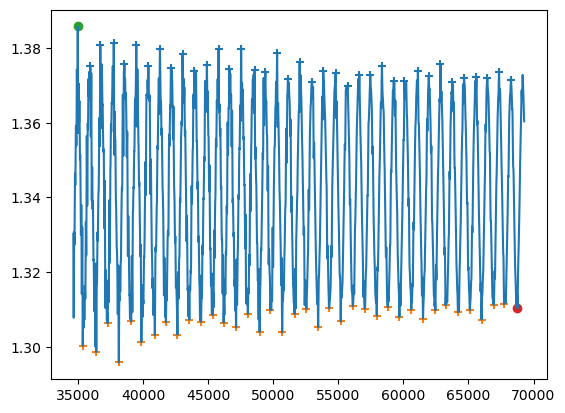

In [5]:
# FIND PEAKS and calc mean drag:

drag_1_stepsLU = drag_1[int(drag_1.shape[0]*periodic_start-1):,0]
drag_1_values = drag_1[int(drag_1.shape[0]*periodic_start-1):,2]

peaks_max = find_peaks(drag_1_values, prominence=((drag_1_values.max()-drag_1_values.min())/2))
peak_max_y = drag_1_values[peaks_max[0]]
peak_max_x = drag_1_stepsLU[peaks_max[0]]

peaks_min = find_peaks(-drag_1_values, prominence=((drag_1_values.max()-drag_1_values.min())/2))
peak_min_y = drag_1_values[peaks_min[0]]
peak_min_x = drag_1_stepsLU[peaks_min[0]]

if peaks_min[0].shape[0] - peaks_max[0].shape[0] > 0:
    peak_number = peaks_max[0].shape[0]
else:
    peak_number = peaks_min[0].shape[0]

if peaks_min[0][0] < peaks_max[0][0]:
    first_peak = peaks_min[0][0]
    last_peak = peaks_max[0][peak_number-1]
else:
    first_peak = peaks_max[0][0]
    last_peak = peaks_min[0][peak_number-1]

plt.plot(drag_1_stepsLU, drag_1_values)
plt.scatter(peak_max_x[:peak_number],peak_max_y[:peak_number],marker="+")
plt.scatter(peak_min_x[:peak_number],peak_min_y[:peak_number],marker="+")
plt.scatter(drag_1_stepsLU[first_peak],drag_1_values[first_peak],marker="o")
plt.scatter(drag_1_stepsLU[last_peak],drag_1_values[last_peak],marker="o")

drag_mean = drag_1_values[first_peak:last_peak].mean()
print(drag_mean)

In [20]:
drag_1[-1,1]
len(drag_1[:,1])

69283

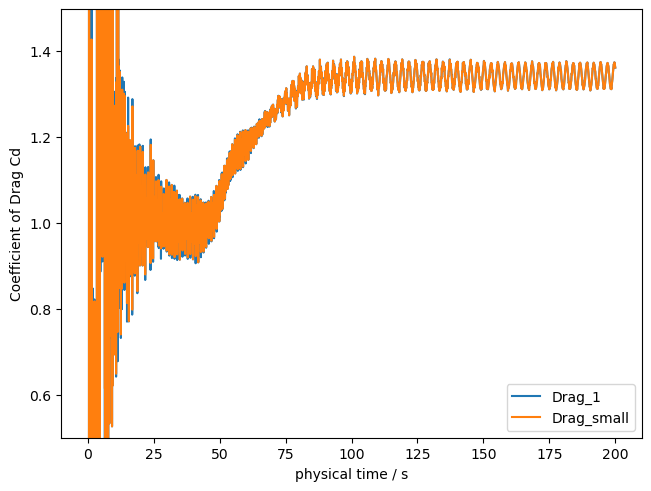

In [21]:
# PLOT DRAG

points = 5000
interval = int(drag_1[-1,0]/points)

drag_small = []

for i in range(drag_1.shape[0]):
    if i % interval == 0:
        drag_small.append(drag_1[i])
drag_small = np.array(drag_small)
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(drag_1[:,1],drag_1[:,2], drag_small[:,1], drag_small[:,2])
#ax.plot(drag_2[:,1],drag_2[:,2])
#ax.plot(drag_1[:,1],drag_diff[:,2])
ax.set_xlabel("physical time / s")
ax.set_ylabel("Coefficient of Drag Cd")
#ax.set_ylim([1,3])
ax.set_ylim([0.5,1.496])
#print(drag_diff[:,2].mean())
#ax.set_xlim([800,1000])
plt.legend(labels=["Drag_1", "Drag_small"])
#plt.title("")

In [19]:
lift_1 = np.loadtxt(str(output_path+data1+"/lift_coefficient.txt"))
#lift_2 = np.loadtxt(str(output_path+data2+"/lift_coefficient.txt"))
#lift_diff = lift_1-lift_2

print("Cl1_peaks: \nmin", lift_1[:,2].min(),"\nmax", lift_1[:,2].max())
#print("\nCl2_peaks: \nmin", lift_2[:,2].min(),"\nmax", lift_2[:,2].max())

Cl1_peaks: 
min -2.1996998097625324 
max 2.217708491654612


(-3.0, 3.0)

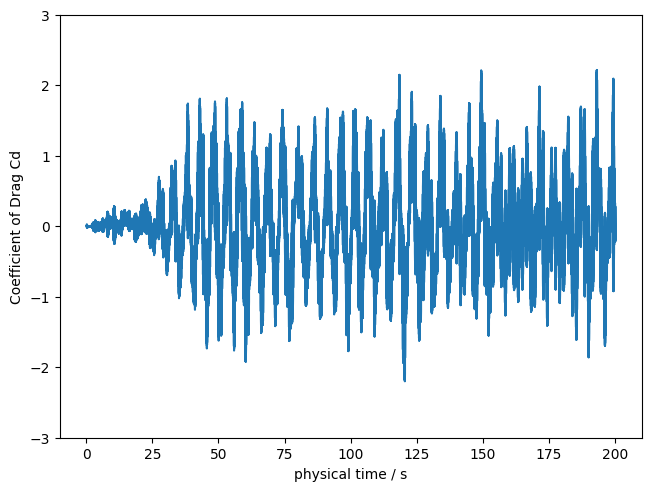

In [20]:
# PLOT LIFT

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(lift_1[:,1],lift_1[:,2])
#ax.plot(lift_2[:,1],lift_2[:,2])
#ax.plot(lift_1[:,1],lift_diff[:,2])
ax.set_xlabel("physical time / s")
ax.set_ylabel("Coefficient of Drag Cd")
ax.set_ylim([-3,3])
#ax.set_ylim([-0.01,0.01])
#ax.set_xlim([80,140])
#plt.legend(labels=["-", "-"])

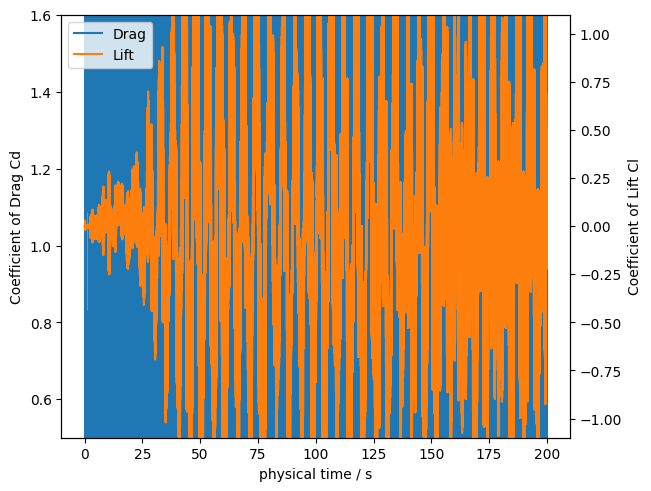

In [28]:
fig, ax = plt.subplots(layout="constrained")
drag_ax = ax.plot(drag_1[:,1],drag_1[:,2], color="tab:blue", label="Drag")
ax.set_xlabel("physical time / s")
ax.set_ylabel("Coefficient of Drag Cd")
ax.set_ylim([0.5,1.6])

#secax = ax.secondary_xaxis('top', functions=(flow.units.convert_time_to_lu, flow.units.convert_time_to_pu))
#secax.set_xlabel("timesteps (simulation time / LU)")

ax2 = ax.twinx()
lift_ax = ax2.plot(lift_1[:,1],lift_1[:,2], color="tab:orange", label="Lift")
ax2.set_ylabel("Coefficient of Lift Cl")
ax2.set_ylim([-1.1,1.1])


fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax.transAxes)

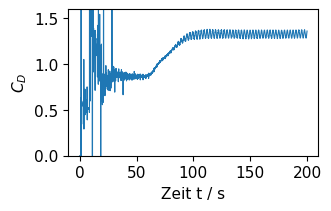

In [11]:
# Re200, GPD50, DPY50
drag = np.loadtxt("/home/mbille/Desktop/drag_coefficient.txt")
lift = np.loadtxt("/home/mbille/Desktop/lift_coefficient.txt")

matplotlib.rcParams.update({'font.size': 11})
matplotlib.rcParams.update({'lines.linewidth': 0.8})
matplotlib.rcParams.update({'figure.figsize': [3.2,2]})

fig, ax = plt.subplots(constrained_layout=True, )
ax.plot(drag[:,1],drag[:,2])
ax.set_xlabel("Zeit t / s")
ax.set_ylabel("$C_{D}$")
ax.set_ylim([0,1.6])
#ax.set_ylim([1.54,1.545])
#ax.set_xlim([500,600])
#secax = ax.secondary_xaxis('top', functions=(flow.units.convert_time_to_lu, flow.units.convert_time_to_pu))
#secax.set_xlabel("timesteps (simulation time / LU)")
plt.show()

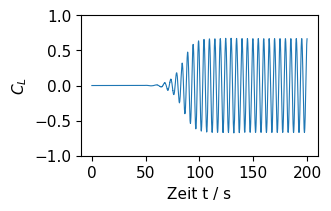

In [13]:
fig, ax = plt.subplots(constrained_layout=True)
ax.plot(lift[:,1],lift[:,2])
ax.set_xlabel("Zeit t / s")
ax.set_ylabel("$C_{L}$")
ax.set_ylim([-1,1])
#ax.set_ylim([1.54,1.545])
#ax.set_xlim([500,600])
#secax = ax.secondary_xaxis('top', functions=(flow.units.convert_time_to_lu, flow.units.convert_time_to_pu))
#secax.set_xlabel("timesteps (simulation time / LU)")
plt.show()

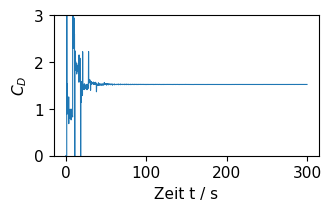

In [15]:
# Re40, GPD50, DPY50
drag = np.loadtxt("/home/mbille/Desktop/drag_coefficient_40.txt")
#lift = np.loadtxt("/home/mbille/Desktop/lift_coefficient.txt")

fig, ax = plt.subplots(constrained_layout=True)
ax.plot(drag[:,1],drag[:,2])
ax.set_xlabel("Zeit t / s")
ax.set_ylabel("$C_{D}$")
ax.set_ylim([0,3])
#ax.set_ylim([1.54,1.545])
#ax.set_xlim([500,600])
#secax = ax.secondary_xaxis('top', functions=(flow.units.convert_time_to_lu, flow.units.convert_time_to_pu))
#secax.set_xlabel("timesteps (simulation time / LU)")
plt.show()